#**Distribuição de Poisson para tomada de decisão informada**

A distribuição de Poisson é uma distribuição de probabilidade discreta usada para modelar a frequência de eventos que ocorrem em um intervalo contínuo fixo, como tempo, área ou volume. Esse modelo é especialmente útil para descrever eventos que ocorrem de forma aleatória e independente, como chamadas telefônicas recebidas por uma central em uma hora ou acidentes de trânsito em uma estrada por dia.

Conforme apontado por Ron Larson e Betsy Farber no livro Estatística Aplicada,para que um experimento seja adequadamente modelado por uma distribuição de Poisson, **ele deve satisfazer algumas condições importantes:**
1.	**Eventos Contados em Intervalos Fixos**: O experimento deve consistir em contar o número de vezes que um evento ocorre em intervalos contínuos, como tempo ou espaço.
2.	**Probabilidade Constante**: A probabilidade de o evento ocorrer deve ser a mesma em intervalos de igual tamanho, independente da localização do intervalo.
3.	**Independência dos Eventos:** A ocorrência de um evento em um intervalo não deve afetar a probabilidade de ocorrência em outro intervalo.
4.	**Baixa Probabilidade de Eventos Simultâneos**: Em um intervalo muito pequeno, a probabilidade de ocorrer mais de um evento é próxima de zero.
A fórmula que descreve a distribuição de Poisson é:

 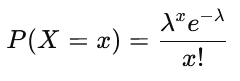

onde:


*   P(X=x) representa a probabilidade de observar exatamente x ocorrências no
intervalo;
*   λ é a média de ocorrências esperadas (taxa média) no intervalo;
*   *e* é a base do logaritmo natural (aproximadamente 2,71828);
*   x! é o fatorial de x.

Essa abordagem é amplamente utilizada para prever a ocorrência de eventos em estudos de estatística aplicada, sendo particularmente útil para análise de dados em áreas como ciência de dados, qualidade e engenharia.


###**Estudo de Caso: Estimativa de Ocorrências de Violência Doméstica no Centro de Atendimento à Mulher**

Em um centro de atendimento à Mulher, por meio do disque denúncia 180, a gestão solicitou ao analista de dados uma estimativa de quantas chamadas de denúncias de violência doméstica podem ser esperadas durante diferentes horas do dia. Essas informações são essenciais para auxiliar na alocação de recursos, definição de turnos de trabalho e planejamento da capacidade, garantindo que todas as chamadas sejam atendidas prontamente e de forma eficaz.

#### **Primeiro Passo: Importando os dados**

 Os dados utilizados neste estudo de caso foram obtidos do portal de dados abertos do Ministério dos Direitos Humanos, disponíveis em https://www.gov.br/mdh/pt-br/acesso-a-informacao/dados-abertos/ligue180. Os dados abrangem o primeiro semestre de 2024.

#### **Segundo Passo: Importar bibliotecas, ler os dados e verificações preliminares**

In [22]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson


In [23]:
#Lendo o arquivo CSV e visualizando as cinco primeira linhas
df= pd.read_csv("/content/drive/MyDrive/analise de dados violencia domestica/ligue180-primeiro-semestre-2024.csv", delimiter=";")
df.head()

<ipython-input-23-52b11a4e3ce6>:2: DtypeWarning: Columns (30,35,55,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/analise de dados violencia domestica/ligue180-primeiro-semestre-2024.csv", delimiter=";")


,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Grau_de_instrução_do_suspeito,Religião_do_suspeito,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao
0,ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...,2024-01-01 00:15:43.310,TELEFÔNICO,NÃO,TERCEIRO,VIA PÚBLICA,BR | BRASIL,ES,3204906 | SÃO MATEUS,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO
1,ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...,2024-01-01 00:15:43.310,TELEFÔNICO,NÃO,TERCEIRO,VIA PÚBLICA,BR | BRASIL,ES,3204906 | SÃO MATEUS,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>OUTROS
2,ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...,2024-01-01 00:15:43.310,TELEFÔNICO,NÃO,TERCEIRO,VIA PÚBLICA,BR | BRASIL,ES,3204906 | SÃO MATEUS,DIARIAMENTE,...,NaN,NaN,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO
3,3ABB8F1D7A6E12902F3D7E38D5235DBBDD8FFAC935DB6F...,2024-01-01 00:20:59.367,TELEFÔNICO,NÃO,TERCEIRO,CASA DE FAMILIARES,BR | BRASIL,MT,5103403 | CUIABÁ,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>TORTURA FÍSICA
4,3ABB8F1D7A6E12902F3D7E38D5235DBBDD8FFAC935DB6F...,2024-01-01 00:20:59.367,TELEFÔNICO,NÃO,TERCEIRO,CASA DE FAMILIARES,BR | BRASIL,MT,5103403 | CUIABÁ,DIARIAMENTE,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>AGRESSÃO ou VIAS DE FATO


In [24]:
linhas, colunas = df.shape

print(f"O DataFrame possui {linhas} linhas e {colunas} colunas.")


O DataFrame possui 394154 linhas e 62 colunas.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394154 entries, 0 to 394153
Data columns (total 62 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   hash                                            394154 non-null  object 
 1   Data_de_cadastro                                394154 non-null  object 
 2   Canal_de_atendimento                            394154 non-null  object 
 3   Denúncia_emergencial                            394154 non-null  object 
 4   Denunciante                                     394059 non-null  object 
 5   Cenário_da_violação                             393928 non-null  object 
 6   País                                            394154 non-null  object 
 7   UF                                              393420 non-null  object 
 8   Município                                       392718 non-null  object 
 9   Frequência                

Temos uma quantidade significativa de dados históricos (mais de 394.000 registros) que podemos utilizar para estimar as chamadas de denúncia no centro de atendimento à Mulher. Também é necessário converter a coluna de 'Data_de_cadastro' de objeto para o tipo de dado datetime para facilitar a análise temporal.

In [26]:
df['Data_de_cadastro']= pd.to_datetime(df['Data_de_cadastro'])
print(df['Data_de_cadastro'].dtype)

datetime64[ns]


In [27]:
#extraindo informações específicas de data e hora da coluna 'Data_de_cadastro' do DataFrame df e criando duas novas colunas:
df['Hora'] = df['Data_de_cadastro'].dt.hour
df['Data'] = df['Data_de_cadastro'].dt.strftime('%Y-%m-%d')
df.head()

,hash,Data_de_cadastro,Canal_de_atendimento,Denúncia_emergencial,Denunciante,Cenário_da_violação,País,UF,Município,Frequência,...,Raça_Cor_do_suspeito,Suspeito_Etnia,Faixa_de_renda_do_suspeito,Vínculo_Órgão_PJ_do_suspeito,sl_suspeito_ramo,suspeito_especificacao_etnia,vitima_especificacao_etnia,violacao,Hora,Data
0,ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...,2024-01-01 00:15:43.310,TELEFÔNICO,NÃO,TERCEIRO,VIA PÚBLICA,BR | BRASIL,ES,3204906 | SÃO MATEUS,DIARIAMENTE,...,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>AMEAÇA ou COAÇÃO,0,2024-01-01
1,ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...,2024-01-01 00:15:43.310,TELEFÔNICO,NÃO,TERCEIRO,VIA PÚBLICA,BR | BRASIL,ES,3204906 | SÃO MATEUS,DIARIAMENTE,...,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>OUTROS,0,2024-01-01
2,ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...,2024-01-01 00:15:43.310,TELEFÔNICO,NÃO,TERCEIRO,VIA PÚBLICA,BR | BRASIL,ES,3204906 | SÃO MATEUS,DIARIAMENTE,...,PARDA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSÍQUICA>CONSTRANGIMENTO,0,2024-01-01
3,3ABB8F1D7A6E12902F3D7E38D5235DBBDD8FFAC935DB6F...,2024-01-01 00:20:59.367,TELEFÔNICO,NÃO,TERCEIRO,CASA DE FAMILIARES,BR | BRASIL,MT,5103403 | CUIABÁ,DIARIAMENTE,...,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>TORTURA FÍSICA,0,2024-01-01
4,3ABB8F1D7A6E12902F3D7E38D5235DBBDD8FFAC935DB6F...,2024-01-01 00:20:59.367,TELEFÔNICO,NÃO,TERCEIRO,CASA DE FAMILIARES,BR | BRASIL,MT,5103403 | CUIABÁ,DIARIAMENTE,...,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FÍSICA>AGRESSÃO ou VIAS DE FATO,0,2024-01-01


In [28]:
#Agrupando o DataFrame df com base nas colunas 'Data' e 'Hora', e exibindo o primeiro registro de cada grupo.
grouped_df = df.groupby(['Data', 'Hora'])
grouped_df.first()

hash  \
Data       Hora                                                      
2024-01-01 0     ADCED6E583BF5600AC69908DD5925E84809602D98FF1FA...   
           1     CA1987A2BDCBA28655AA18341533006A28D5D577CBF69B...   
           2     CA524A4EEC18EF1B96D32442ED2D9C984513FDCB7EB9D2...   
           3     C0A8D822220B71AD839FCD4565AEDABF6968A756AD8F4C...   
           4     9EED37843D807EE10441A46090A70A67CAD2FF240A7783...   
...                                                            ...   
2024-06-30 19    CDFC942456BA63F825D9EAE1EC872CF221E3A86B2C4F0D...   
           20    809499AC173CC26BBDE44D9D75B186D23F2DB1CAE7B45E...   
           21    734B9F1AB47B1FC200F58345CEB4CD8C521F74EB28FE8D...   
           22    0F54F2251DDB9C8E170B05B5DF879E5313DBF75705D5E0...   
           23    97C316644BFE3A9202B106F15C05E721DAAFCD70938A21...   

                       Data_de_cadastro Canal_de_atendimento  \
Data       Hora                                                
2024-01-01 0    2024-01-01 00:15:43.310           TELEFÔNICO   
           1    2024-01-01 01:44:49.127             WHATSAPP   
           2    2024-01-01 02:15:38.337           TELEFÔNICO   
           3    2024-01-01 03:53:15.743           TELEFÔNICO   
           4    2024-01-01 04:31:49.057           TELEFÔNICO   
...                                 ...                  ...   
2024-06-30 19   2024-06-30 19:04:26.990           TELEFÔNICO   
           20   2024-06-30 20:11:35.247           TELEFÔNICO   
           21   2024-06-30 21:02:10.127             WHATSAPP   
           22   2024-06-30 22:05:56.167           TELEFÔNICO   
           23   2024-06-30 23:05:09.337           TELEFÔNICO   

                Denúncia_emergencial       Denunciante  \
Data       Hora                                          
2024-01-01 0                     NÃO          TERCEIRO   
           1                     NÃO          TERCEIRO   
           2                     NÃO  A PRÓPRIA VÍTIMA   
           3                     NÃO  A PRÓPRIA VÍTIMA   
           4                     NÃO  A PRÓPRIA VÍTIMA   
...                              ...               ...   
2024-06-30 19                    NÃO  A PRÓPRIA VÍTIMA   
           20                    NÃO          TERCEIRO   
           21                    NÃO  A PRÓPRIA VÍTIMA   
           22                    NÃO  A PRÓPRIA VÍTIMA   
           23                    NÃO  A PRÓPRIA VÍTIMA   

                                    Cenário_da_violação         País  UF  \
Data       Hora                                                            
2024-01-01 0                                VIA PÚBLICA  BR | BRASIL  ES   
           1     CASA ONDE RESIDE A VÍTIMA E O SUSPEITO  BR | BRASIL  GO   
           2                             CASA DA VÍTIMA  BR | BRASIL  RJ   
           3                             CASA DA VÍTIMA  BR | BRASIL  SP   
           4     CASA ONDE RESIDE A VÍTIMA E O SUSPEITO  BR | BRASIL  RJ   
...                                                 ...          ...  ..   
2024-06-30 19                          CASA DO SUSPEITO  BR | BRASIL  RJ   
           20    CASA ONDE RESIDE A VÍTIMA E O SUSPEITO  BR | BRASIL  BA   
           21    CASA ONDE RESIDE A VÍTIMA E O SUSPEITO  BR | BRASIL  PA   
           22                            CASA DA VÍTIMA  BR | BRASIL  RJ   
           23    CASA ONDE RESIDE A VÍTIMA E O SUSPEITO  BR | BRASIL  BA   

                                Município        Frequência  ...  \
Data       Hora                                              ...   
2024-01-01 0         3204906 | SÃO MATEUS       DIARIAMENTE  ...   
           1        5214606 | NIQUELÂNDIA       DIARIAMENTE  ...   
           2     3304557 | RIO DE JANEIRO  ÚNICA OCORRÊNCIA  ...   
           3           3542602 | REGISTRO  ÚNICA OCORRÊNCIA  ...   
           4     3304557 | RIO DE JANEIRO    OCASIONALMENTE  ...   
...                                   ...               ...  ...   
2024-06-30 19    3304557 | RIO

### **Terceito passo: Análise exploratória de dados**

 Análises exploratórias de dados para compreendê-los e responder a algumas perguntas.

###**Qual o canal de atendimento mais utilizado?**




In [29]:
# Contar a frequência de cada canal de atendimento
canal_mais_utilizado = df['Canal_de_atendimento'].value_counts()
canal_mais_utilizado

,count
Canal_de_atendimento,
TELEFÔNICO,355639
WHATSAPP,31780
WEBCHAT,2531
E-MAIL,1834
TELEGRAM,1053
PROCESSO SEI,1034
PRESENCIAL,203
VIDEOCHAMADA,42
CARTA,27


Canal telefônico é disparadamente o canal de atendimento mais utilizado.

### **Qual estado onde tem mais denúncias no 180?**

In [30]:
estado_mais_violencia = df['UF'].value_counts()
estado_mais_violencia.head(5)

,count
UF,
SP,95571
RJ,64696
MG,39771
BA,26982
RS,20325


O estado de São Paulo (SP) apresenta o maior número de ocorrências de violência doméstica, com um total de 95.571 registros. Em seguida, temos o Rio de Janeiro (RJ) com 64.696 ocorrências, Minas Gerais (MG) com 39.771, Bahia (BA) com 26.982 e Rio Grande do Sul (RS) com 20.325.

### **Contando o número de atendimentos (ou ocorrências)**:

In [31]:
numero_atendimentos = grouped_df['Data_de_cadastro'].count().reset_index()
numero_atendimentos.columns= ['Data', 'Hora', 'numero_atendimentos']
numero_atendimentos.head(5)

,Data,Hora,numero_atendimentos
0,2024-01-01,0,7
1,2024-01-01,1,3
2,2024-01-01,2,14
3,2024-01-01,3,2
4,2024-01-01,4,7


In [38]:
# Usando o Pivot table para reorganizar os dados
relatorio = pd.pivot_table(data = numero_atendimentos,
              index='Data',
              columns='Hora',
              values='numero_atendimentos')
relatorio

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,7.0,3.0,14.0,2.0,7.0,7.0,4.0,56.0,66.0,29.0,...,90.0,49.0,84.0,69.0,158.0,89.0,64.0,92.0,105.0,61.0
2024-01-02,22.0,2.0,15.0,21.0,NaN,NaN,22.0,52.0,110.0,162.0,...,188.0,113.0,121.0,240.0,131.0,149.0,86.0,95.0,88.0,81.0
2024-01-03,25.0,25.0,18.0,4.0,7.0,2.0,32.0,32.0,43.0,125.0,...,210.0,198.0,140.0,233.0,199.0,116.0,81.0,41.0,87.0,68.0
2024-01-04,31.0,8.0,6.0,7.0,22.0,2.0,NaN,47.0,85.0,123.0,...,134.0,171.0,155.0,66.0,134.0,109.0,65.0,65.0,62.0,69.0
2024-01-05,27.0,31.0,8.0,11.0,10.0,NaN,3.0,96.0,58.0,122.0,...,186.0,100.0,82.0,148.0,40.0,87.0,143.0,42.0,51.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,74.0,33.0,14.0,11.0,12.0,31.0,6.0,31.0,69.0,197.0,...,118.0,197.0,105.0,128.0,110.0,184.0,105.0,151.0,128.0,94.0
2024-06-27,78.0,8.0,26.0,20.0,NaN,4.0,37.0,24.0,55.0,152.0,...,177.0,65.0,142.0,84.0,197.0,71.0,93.0,171.0,78.0,90.0
2024-06-28,22.0,NaN,18.0,44.0,6.0,13.0,23.0,54.0,56.0,150.0,...,145.0,88.0,136.0,100.0,137.0,135.0,156.0,91.0,138.0,141.0


In [33]:
#verificando se há valores nulos e somando caso haja
relatorio.isnull().sum()

,0
Hora,
0,0
1,4
2,11
3,19
4,36
5,26
6,14
7,0
8,1


In [34]:
# Substituindo os valores nulos por O
relatorio.fillna(0, inplace=True)
relatorio

Hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Data,,,,,,,,,,,,,,,,,,,,,
2024-01-01,7.0,3.0,14.0,2.0,7.0,7.0,4.0,56.0,66.0,29.0,...,90.0,49.0,84.0,69.0,158.0,89.0,64.0,92.0,105.0,61.0
2024-01-02,22.0,2.0,15.0,21.0,0.0,0.0,22.0,52.0,110.0,162.0,...,188.0,113.0,121.0,240.0,131.0,149.0,86.0,95.0,88.0,81.0
2024-01-03,25.0,25.0,18.0,4.0,7.0,2.0,32.0,32.0,43.0,125.0,...,210.0,198.0,140.0,233.0,199.0,116.0,81.0,41.0,87.0,68.0
2024-01-04,31.0,8.0,6.0,7.0,22.0,2.0,0.0,47.0,85.0,123.0,...,134.0,171.0,155.0,66.0,134.0,109.0,65.0,65.0,62.0,69.0
2024-01-05,27.0,31.0,8.0,11.0,10.0,0.0,3.0,96.0,58.0,122.0,...,186.0,100.0,82.0,148.0,40.0,87.0,143.0,42.0,51.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,74.0,33.0,14.0,11.0,12.0,31.0,6.0,31.0,69.0,197.0,...,118.0,197.0,105.0,128.0,110.0,184.0,105.0,151.0,128.0,94.0
2024-06-27,78.0,8.0,26.0,20.0,0.0,4.0,37.0,24.0,55.0,152.0,...,177.0,65.0,142.0,84.0,197.0,71.0,93.0,171.0,78.0,90.0
2024-06-28,22.0,0.0,18.0,44.0,6.0,13.0,23.0,54.0,56.0,150.0,...,145.0,88.0,136.0,100.0,137.0,135.0,156.0,91.0,138.0,141.0


###**Visualizando a Distribuição**

<Axes: xlabel='Hora', ylabel='numero_atendimentos'>

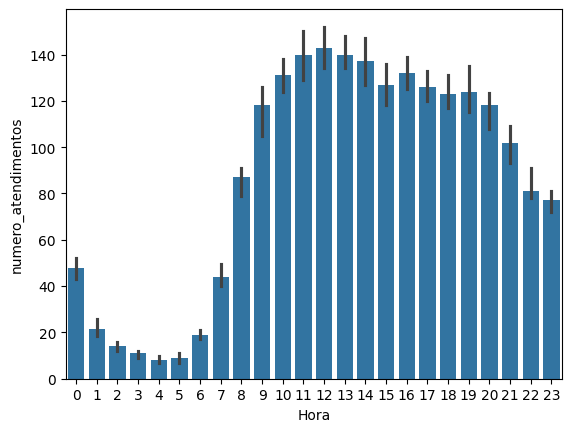

In [39]:
relatorio_reset = relatorio.reset_index()
relatorio_final= pd.melt(relatorio_reset, id_vars=['Data'], value_vars=relatorio.columns, var_name='Hora', value_name='numero_atendimentos')

'''
o valor mediano é usado como estimador em vez do padrão (média),
porque a mediana é menos afetada por valores extremos em comparação com a média.
'''
sns.barplot(x='Hora', y='numero_atendimentos', data=relatorio_final, estimator=np.median)

O gráfico revela que o número de ocorrências começa a aumentar a partir das 7h da manhã, atingindo seu pico entre as 10h e 15h.Durante a madrugada (entre 0h e 6h), o número de ocorrências é significativamente menor, possivelmente devido ao horário em que as pessoas estão dormindo ou menos ativas.

### **Usando a Distribuição de Poisson**

Proximo passo, usaremos a distribuição de Poisson para estimar as probabilidades de diferentes números de ocorrências de violência doméstica relatadas em uma determinada hora.

**O código abaixo funciona da seguinte forma:**

1.   Aceita a entrada do usuário sobre qual hora ele gostaria de obter informações em relação às ocorrências de violência doméstica.
2.   Valida se a entrada é um número inteiro. O código prossegue se for um inteiro.
3. Plota a distribuição do número de possíveis ocorrências que podem ser registradas naquela hora.
4. Calcula a probabilidade de receber cada número de ocorrências possíveis. Neste caso, notamos que o valor de lambda (taxa média) para cada hora do dia é diferente. Lembre-se de que estamos tratando cada hora como um intervalo de tempo separado com sua taxa constante.
5. Imprime o número de ocorrências com as maiores probabilidades para aquela hora.


Digite a hora que você deseja obter as informações sobre as ocorrências de violência doméstica:10
Entrada aceita!


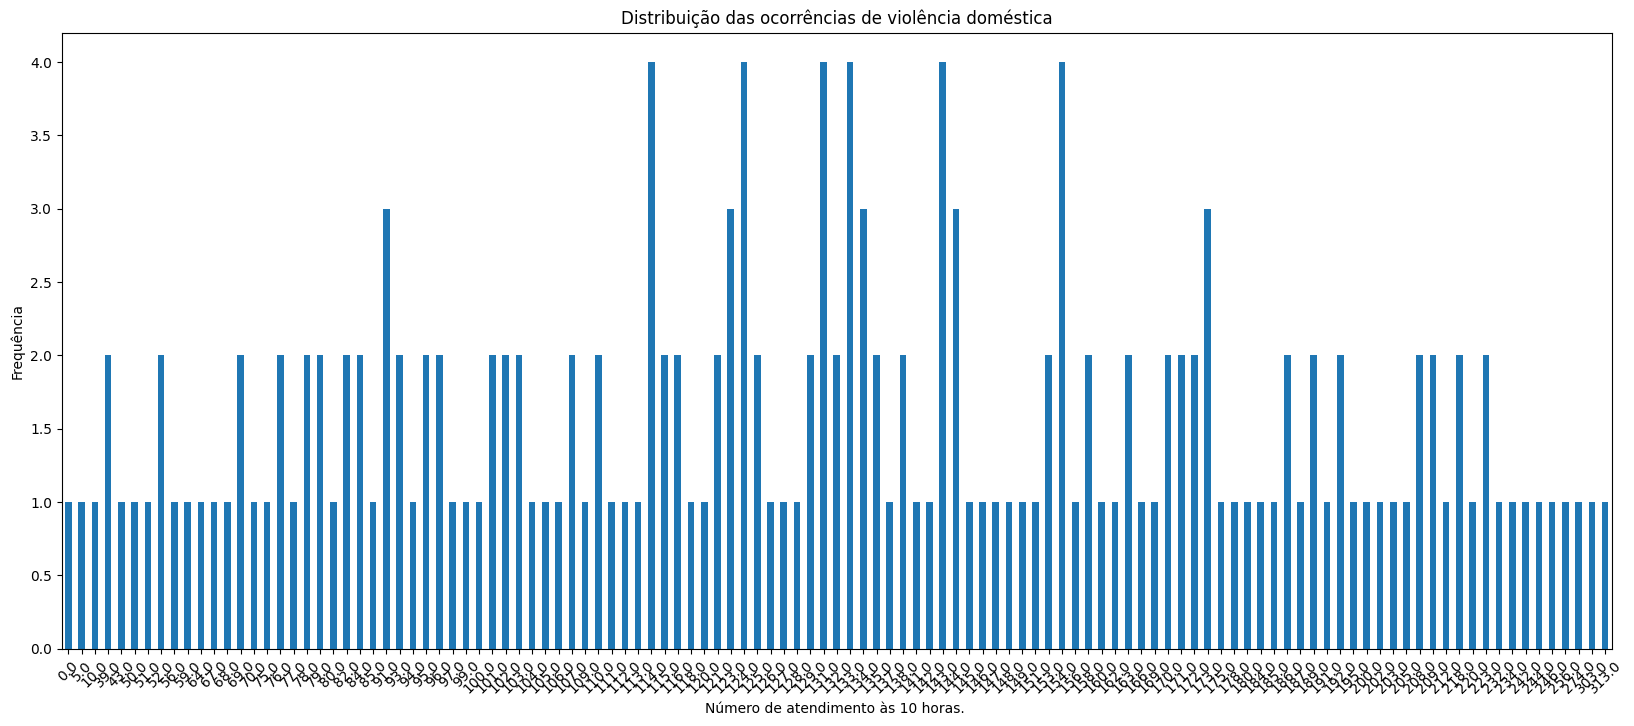

    numero_atendimento  prob%
9                  130   3.48
10                 131   3.48
8                  129   3.46
11                 132   3.46
12                 133   3.40
7                  128   3.40
13                 134   3.33
6                  127   3.33
14                 135   3.23
5                  126   3.22


In [37]:
hora_do_dia = int(input('Digite a hora que você deseja obter as informações sobre as ocorrências de violência doméstica:'))

while hora_do_dia < 0 or hora_do_dia > 23:
    print('Entrada inválida! \n A entrada deve ser um número inteiro entre 0 e 23')
    hora_do_dia = int(input('Digite a hora que você deseja obter as informações sobre as ocorrências de violência doméstica:'))

else:
    print('Entrada aceita!')

    #Plotando a distribuição
    fig, ax = plt.subplots(figsize=(20,8))
    ax.set_title('Distribuição das ocorrências de violência doméstica')

    data = relatorio[hora_do_dia].value_counts().sort_index().plot(kind='bar', ax=ax)

    ax.set_xlabel(f'Número de atendimento às {hora_do_dia} horas. ')
    ax.set_ylabel('Frequência')
    plt.xticks(rotation = 45)
    plt.show()


    #Retornando as probabilidades
    lambda_ = relatorio[hora_do_dia].median()

    #Definindo o número possível de atendimentos
    minimo = int(lambda_) - 10
    maximo = int(lambda_) + 20

    num_atendimento = range(minimo,maximo)

    #calculate the probabilities for different numbers of calls
    estimativa = []
    for num in num_atendimento:
        if num>=0:
            estimativa.append([num, round(poisson.pmf(num, mu=lambda_), 4)*100])

    est_df = pd.DataFrame(estimativa, columns=['numero_atendimento', 'prob%'])

    maior_probabilidade = est_df.sort_values(by = 'prob%', ascending=False).head(10)

    print(maior_probabilidade)

A tabela mostra os 10 números de chamadas mais prováveis ​​de serem recebidas, em comparação com outros números de chamadas na distribuição da 10ª hora. Isso significa que na central de atendimento à Mulher, durante a 10ª hora (10h - 11h) de qualquer dia, é mais provável que recebamos de130 a 131 ligações.


##**Tomada de decisão informada com base na análise da 10ª hora**
Precisamos de um número suficiente de atendentes para gerenciar entre 130 a 131 chamadas durante a 10ª hora (10h - 11h), levando em consideração o tempo médio de atendimento por chamada.

Por exemplo, se cada chamada leva cerca de 4 minutos, atender 131 chamadas exigiria aproximadamente 524 minutos de tempo de atendimento total. Essa informação nos permite planejar adequadamente e decidir o número de atendentes necessários para o turno da 10ª hora, garantindo que todas as chamadas sejam atendidas sem sobrecarregar a equipe.

Levando em consideração que o canal de atendimento mais utilizado é o meio telefônico, essa análise deixa clara a necessidade de alocar e, se necessário, remanejar atendentes para suportar a demanda de chamadas durante o horário de pico. O meio telefônico, sendo o principal canal de contato das vítimas, exige uma resposta rápida e eficaz para assegurar que nenhuma ligação seja perdida, principalmente em horários de alta demanda.

Além disso, podemos implementar um sistema para alocar recursos de forma dinâmica com base em dados de volume de chamadas em tempo real. Esse sistema permitiria o envio rápido de recursos adicionais caso o número de chamadas exceda o esperado, garantindo que o sistema de roteamento de chamadas possa lidar com pelo menos 130 a 131 chamadas simultâneas sem deixar nenhuma chamada sem resposta.

Por fim, para garantir a eficiência a longo prazo, podemos modelar a distribuição de chamadas para todas as horas do dia, a fim de entender os padrões de chamadas ao longo do tempo e do ano. Isso nos ajudará a prever tendências futuras e a planejar recursos com maior precisão, de acordo com as demandas esperadas.

### **Conclusão**
Diante do exposto, pode-se concluir que a distribuição de Poisson é de suma importância para estimar a probabilidade de um determinado número de atendimentos em uma hora específica, com base em uma taxa média histórica (lambda). Isso é útil para prever a demanda de ocorrências de violência doméstica ao longo do dia, possibilitando uma melhor alocação de recursos e equipes de suporte.

Com esses dados, é possível planejar turnos e aumentar a equipe nos horários de maior demanda, o que ajuda a reduzir o tempo de resposta e a melhorar a eficiência do atendimento, beneficiando diretamente as vítimas de violência doméstica.